In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols

%matplotlib inline

#### Data downloading

In [85]:
df1 = pd.read_csv('lease_result/flats_0_4000.csv')

In [86]:
df2 = pd.read_csv('lease_result/flats_4000_8000.csv')

In [87]:
df3 = pd.read_csv('lease_result/flats_8000_12000.csv')

In [88]:
df4 = pd.read_csv('lease_result/flats_12000_end.csv')

In [89]:
df5 = pd.read_csv('lease_result/flats_zap.csv')

In [90]:
df = pd.concat([df1, df2, df3, df4, df5])

In [91]:
df = df.iloc[:, 1:]

In [92]:
df = df[['Lat', 'Lon', 'District', 'Small_district', 'Rooms', 'Price', 'Price_duplicate', 'Totsp', 'Livesp',\
 'Kitsp', 'Dist', 'Stname', 'Metrdist', 'Walk', 'Rem', 'Brick', 'Tel', 'Bal', 'Floor', 'Nfloors', 'New','Link']]

#### Our apartment

In [93]:
our_flat = {'lon': 37.604610,'lat': 55.866111, 'rooms': 1, 'totsp': 37.8, 'kitsp': 7.4, \
            'bal': 1, 'tel': 1, 'floor': 6/17, 'Metrdist': 5, 'Walk': 1}

### Find comparable

For Metro

In [338]:
df_comp = df[df['Small_district']=='Отрадное'].copy()

In [215]:
sp_comp = ((df_comp['Totsp'] <= 38) & (df_comp['Totsp'] >= 37))
df_comp = df_comp[sp_comp].copy()

In [218]:
df_comp['Floor_index'] = df_comp['Floor']/df_comp['Nfloors']
fl_comp = ((df_comp['Floor']>1) & (df_comp['Floor_index']<1))
df_comp = df_comp[fl_comp]

In [220]:
df_comp = df_comp[df_comp['Bal'] == 1]

In [231]:
df_comp = df_comp[df_comp['Walk']==1]

In [248]:
df_comp

,Lat,Lon,District,Small_district,Rooms,Price,Price_duplicate,Totsp,Livesp,Kitsp,...,Walk,Rem,Brick,Tel,Bal,Floor,Nfloors,New,Link,Floor_index
928,55.861231,37.596309,2,Отрадное,1,33000,33000.0,38,10,20,...,1,евроремонт,0,0,1,11,17,NaN,http://www.cian.ru/rent/flat/151563096/,0.647059
1841,55.870991,37.617527,2,Отрадное,1,26000,26000.0,38,NaN,21,...,1,косметический,0,0,1,3,9,NaN,http://www.cian.ru/rent/flat/151343146/,0.333333
2319,55.875213,37.590686,2,Отрадное,1,33000,33000.0,38,NaN,18,...,1,евроремонт,0,0,1,13,22,1,http://www.cian.ru/rent/flat/151447955/,0.590909
124,55.857644,37.619603,2,Отрадное,1,32000,32000.0,38,12,18,...,1,отсутствует,1,0,1,10,16,1,http://www.cian.ru/rent/flat/151461014/,0.625000
976,55.861135,37.590973,2,Отрадное,1,50000,50000.0,37,10,20,...,1,косметический,0,0,1,14,17,NaN,http://www.cian.ru/rent/flat/151604814/,0.823529
1524,55.863949,37.607754,2,Отрадное,1,38000,38000.0,38,10,28,...,1,евроремонт,0,0,1,4,9,NaN,http://www.cian.ru/rent/flat/151210069/,0.444444
360,55.875213,37.590686,2,Отрадное,1,33000,33000.0,38,NaN,18,...,1,евроремонт,0,0,1,13,22,1,http://www.cian.ru/rent/flat/151448495/,0.590909
739,55.861135,37.590973,2,Отрадное,1,50000,50000.0,37,NaN,22,...,1,NaN,0,0,1,14,17,NaN,http://www.cian.ru/rent/flat/151616929/,0.823529
1129,55.870688,37.612461,2,Отрадное,1,34000,34000.0,38,10,21,...,1,косметический,0,0,1,17,18,NaN,http://www.cian.ru/rent/flat/151609055/,0.944444
2213,55.865510,37.616656,2,Отрадное,1,30000,30000.0,38,NaN,20,...,1,косметический,0,0,1,7,9,1,http://www.cian.ru/rent/flat/151619306/,0.777778


Very similar flat

In [233]:
df_comp.loc[928, :]

Lat                                                55.8612
Lon                                                37.5963
District                                                 2
Small_district                                    Отрадное
Rooms                                                    1
Price                                                33000
Price_duplicate                                    33000.0
Totsp                                                   38
Livesp                                                  10
Kitsp                                                   20
Dist                                               834.179
Stname                                            Отрадное
Metrdist                                                 5
Walk                                                     1
Rem                                             евроремонт
Brick                                                    0
Tel                                                     

Поскольку тут отличается только параметр ремонта - сразу посморим на скорректированную формулу.

In [266]:
Price0 = df_comp.loc[928, 'Price']*1.068
Price0

35244.0

Создадим списк, куда будем складывать скорректированные цены

In [289]:
l_adj_prices = []
l_adj_prices.append(Price0)

---

For Apartment size

In [360]:
df_comp2 = df[df['Small_district']=='Отрадное'].copy()

Correct for floor

In [361]:
df_comp2['Floor_index'] = df_comp2['Floor']/df_comp2['Nfloors']
fl_comp2 = ((df_comp2['Floor']>1) & (df_comp2['Floor_index']<1))
df_comp2 = df_comp2[fl_comp2]

Balcon and Walk

In [362]:
df_comp2 = df_comp2[df_comp2['Bal'] == 1]
df_comp2 = df_comp2[df_comp2['Walk'] == 1]

Proximity to metro

In [363]:
df_comp2 = df_comp2[(df_comp2['Metrdist']>=4) & (df_comp2['Metrdist']<=6)]

In [364]:
df_comp2

,Lat,Lon,District,Small_district,Rooms,Price,Price_duplicate,Totsp,Livesp,Kitsp,...,Walk,Rem,Brick,Tel,Bal,Floor,Nfloors,New,Link,Floor_index
55,55.860600,37.596471,2,Отрадное,3,60000,60000.0,75,11.0,47,...,1,евроремонт,0,0,1,14,17,1,http://www.cian.ru/rent/flat/147673532/,0.823529
351,55.861767,37.610916,2,Отрадное,1,30000,30000.0,39,NaN,25,...,1,косметический,0,0,1,7,12,1,http://www.cian.ru/rent/flat/151053124/,0.583333
677,55.879046,37.610961,2,Отрадное,1,35000,35000.0,40,10.0,22,...,1,косметический,0,0,1,10,17,1,http://www.cian.ru/rent/flat/151557418/,0.588235
928,55.861231,37.596309,2,Отрадное,1,33000,33000.0,38,10.0,20,...,1,евроремонт,0,0,1,11,17,NaN,http://www.cian.ru/rent/flat/151563096/,0.647059
1318,55.860186,37.594755,2,Отрадное,2,50000,50000.0,54,10.0,34,...,1,евроремонт,0,0,1,4,17,NaN,http://www.cian.ru/rent/flat/151362963/,0.235294
1576,55.869486,37.596848,2,Отрадное,3,55000,55000.0,72,10.0,50,...,1,евроремонт,1,0,1,12,18,NaN,http://www.cian.ru/rent/flat/151242671/,0.666667
1602,55.867975,37.601537,2,Отрадное,3,38000,38000.0,54,NaN,33,...,1,NaN,0,0,1,6,9,NaN,http://www.cian.ru/rent/flat/151354326/,0.666667
1731,55.869486,37.596848,2,Отрадное,3,65000,65000.0,75,NaN,54,...,1,NaN,1,0,1,12,16,NaN,http://www.cian.ru/rent/flat/151326337/,0.750000
2297,55.864460,37.599094,2,Отрадное,3,43000,43000.0,60,12.0,45,...,1,косметический,0,0,1,11,12,1,http://www.cian.ru/rent/flat/151581558/,0.916667
1524,55.863949,37.607754,2,Отрадное,1,38000,38000.0,38,10.0,28,...,1,евроремонт,0,0,1,4,9,NaN,http://www.cian.ru/rent/flat/151210069/,0.444444


### Посмотрим на данные внимательнee

In [96]:
len(df)

15936

In [94]:
for c in df.columns:
    print(c, len(df[c][df[c].isnull()]))

Lat 0
Lon 0
District 0
Small_district 1566
Rooms 0
Price 112
Price_duplicate 0
Totsp 0
Livesp 8425
Kitsp 658
Dist 0
Stname 900
Metrdist 900
Walk 900
Rem 2104
Brick 1566
Tel 0
Bal 0
Floor 4
Nfloors 4
New 9162
Link 0


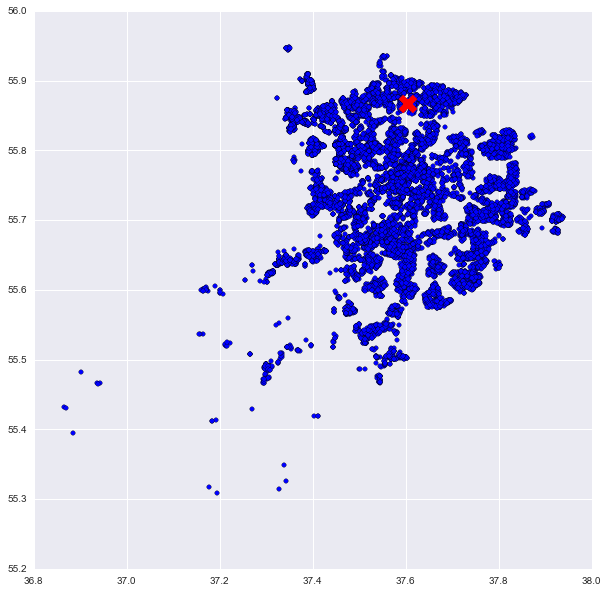

In [95]:
plt.figure(figsize=(10,10))
plt.scatter(df['Lon'], df['Lat'])
plt.scatter(our_flat['lon'], our_flat['lat'], color='red', marker='x', s=20, linewidths=20)

Снова соберем отдельно данные по похожим квартирам

In [97]:
l_small_districts = ['Отрадное', 'Митино', 'Чертаново Южное', 'Перово', 'Кузьминки', 'Текстильщики', 'Царицыно', 'Печатники', \
                     'Ивановское', 'Новогиреево', 'Ясенево', 'Измайлово', 'Восточное Измайлово', 'Головинский', \
                     'Северное Медведково', 'Южное Медведково', 'Бабушкинский', 'Ховрино', 'Левобережный', 'Южное Тушино', \
                     'Северное Тушино']

In [98]:
l = []
for d in l_small_districts:
    l.append((d, len(df[df['Small_district'] == d])))
s = 0
for i in l:
    print(i[0],': ',i[1])
    s = s + i[1]
print(s)

Отрадное :  129
Митино :  443
Чертаново Южное :  133
Перово :  127
Кузьминки :  174
Текстильщики :  85
Царицыно :  98
Печатники :  100
Ивановское :  130
Новогиреево :  105
Ясенево :  104
Измайлово :  73
Восточное Измайлово :  63
Головинский :  103
Северное Медведково :  93
Южное Медведково :  70
Бабушкинский :  80
Ховрино :  120
Левобережный :  88
Южное Тушино :  172
Северное Тушино :  302
2792


### Отбор comparables

#### Proximity to metro

In [182]:
df_adj_prox = df.loc[df['Small_district'].isin(l_small_districts)].copy()

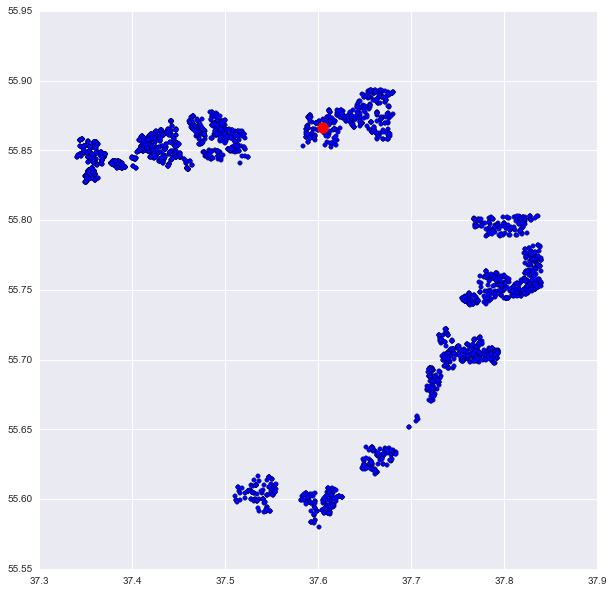

In [183]:
plt.figure(figsize=(10,10))
plt.scatter(df_adj_prox['Lon'], df_adj_prox['Lat'])
plt.scatter(our_flat['lon'], our_flat['lat'], color='red', s=40, linewidths=5)

Схожий метраж

In [184]:
sp_adj_prox = ((df_adj_prox['Totsp'] <= 38) & (df_adj_prox['Totsp'] >= 37))
df_adj_prox = df_adj_prox[sp_adj_prox].copy()

Корректировка на этаж

In [185]:
df_adj_prox['Floor_index'] = df_adj_prox['Floor']/df_adj_prox['Nfloors']

In [186]:
fl_adj = ((df_adj_prox['Floor']>1) & (df_adj_prox['Floor_index']<1))

In [187]:
df_adj_prox = df_adj_prox[fl_adj]

Количество комнат

In [188]:
df_adj_prox = df_adj_prox[df_adj_prox['Rooms'] == 1]

Балкон

In [189]:
df_adj_prox = df_adj_prox[df_adj_prox['Bal'] == 1]

Остались смые похожие квартиры по всем параметрам, кроме расстояния до метро

In [196]:
df_adj_prox = df_adj_prox[df_adj_prox['Walk']==1].copy()

In [203]:
df_adj_prox['Price'] = list(map(float, list(df_adj_prox['Price_duplicate'])))

Регрессия

In [208]:
model = ols('Price ~ Metrdist', data = df_adj_prox).fit()

In [209]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     3.738
Date:                Wed, 30 Nov 2016   Prob (F-statistic):             0.0555
Time:                        02:30:14   Log-Likelihood:                -1209.4
No. Observations:                 122   AIC:                             2423.
Df Residuals:                     120   BIC:                             2428.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   3.304e+04    901.911     36.629      0.000      3.13e+04  3.48e+04
Metrdist    -139.4507     72.124     -1.933      0.056      -282.250     3.349
==============================================================================
Omnibus:                       46.104   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.907
Skew:                           1.533   Prob(JB):                     1.01e-23
Kurtosis:                       6.381   Cond. No.                         25.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [236]:
model.params

Intercept    33036.079369
Metrdist      -139.450741
dtype: float64

##### Adjusted prices

In [256]:
Metro_adj1 = (model.params[0] + model.params[1]*5)/(model.params[0] + model.params[1]*15)

In [257]:
price_cmop_metro1 = df_comp.loc[1841, :]
price_cmop_metro1

Lat                                                 55.871
Lon                                                37.6175
District                                                 2
Small_district                                    Отрадное
Rooms                                                    1
Price                                                26000
Price_duplicate                                    26000.0
Totsp                                                   38
Livesp                                                 NaN
Kitsp                                                   21
Dist                                               912.747
Stname                                            Отрадное
Metrdist                                                15
Walk                                                     1
Rem                                          косметический
Brick                                                    0
Tel                                                     

In [290]:
Price1 = price_cmop_metro1['Price']*Metro_adj1*1.022
Price1

27769.468649677299

In [291]:
l_adj_prices.append(Price1)

---

In [292]:
Metro_adj2 = (model.params[0] + model.params[1]*5)/(model.params[0] + model.params[1]*10)

In [293]:
price_cmop_metro2 = df_comp.loc[2213, :]
price_cmop_metro2

Lat                                                55.8655
Lon                                                37.6167
District                                                 2
Small_district                                    Отрадное
Rooms                                                    1
Price                                                30000
Price_duplicate                                    30000.0
Totsp                                                   38
Livesp                                                 NaN
Kitsp                                                   20
Dist                                               868.599
Stname                                            Отрадное
Metrdist                                                10
Walk                                                     1
Rem                                          косметический
Brick                                                    0
Tel                                                     

In [294]:
Price2 = price_cmop_metro2['Price']*Metro_adj2*1.022
Price2

31335.623786243104

In [295]:
l_adj_prices.append(Price2)

---

In [296]:
Metro_adj3 = (model.params[0] + model.params[1]*5)/(model.params[0] + model.params[1]*20)

In [297]:
price_cmop_metro3 = df_comp.loc[360, :]
price_cmop_metro3

Lat                                                55.8752
Lon                                                37.5907
District                                                 2
Small_district                                    Отрадное
Rooms                                                    1
Price                                                33000
Price_duplicate                                    33000.0
Totsp                                                   38
Livesp                                                 NaN
Kitsp                                                   18
Dist                                               946.799
Stname                                            Отрадное
Metrdist                                                20
Walk                                                     1
Rem                                             евроремонт
Brick                                                    0
Tel                                                     

In [298]:
Price3 = price_cmop_metro3['Price']*Metro_adj3*1.068
Price3

37681.328383175925

In [299]:
l_adj_prices.append(Price3)

---

In [328]:
Metro_adj4 = (model.params[0] + model.params[1]*5)/(model.params[0] + model.params[1]*13)

In [329]:
price_cmop_metro4 = df_comp.loc[1129, :]
price_cmop_metro4

Lat                                                55.8707
Lon                                                37.6125
District                                                 2
Small_district                                    Отрадное
Rooms                                                    1
Price                                                34000
Price_duplicate                                    34000.0
Totsp                                                   38
Livesp                                                  10
Kitsp                                                   21
Dist                                               910.304
Stname                                            Отрадное
Metrdist                                                13
Walk                                                     1
Rem                                          косметический
Brick                                                    0
Tel                                                     

In [330]:
Price4 = price_cmop_metro4['Price']*Metro_adj4*1.022
Price4

35989.54636241035

In [331]:
l_adj_prices.append(Price4)

In [334]:
np.mean(l_adj_prices), len(l_adj_prices)

(33603.993436301338, 5)

---

#### Apartment size

In [303]:
df_adj_size = df.loc[df['Small_district'].isin(l_small_districts)].copy()

Correcting for floor

In [304]:
df_adj_size['Floor_index'] = df_adj_size['Floor']/df_adj_size['Nfloors']
fl_adj = ((df_adj_size['Floor']>1) & (df_adj_size['Floor_index']<1))
df_adj_size = df_adj_size[fl_adj]

Number of rooms, Balcon, Walk

In [307]:
df_adj_size = df_adj_size[df_adj_size['Rooms'] == 1]
df_adj_size = df_adj_size[df_adj_size['Bal'] == 1]
df_adj_size = df_adj_size[df_adj_size['Walk']==1]

Correcting for Metro proximity

In [320]:
df_adj_size = df_adj_size[(df_adj_size['Metrdist']>=4) & (df_adj_size['Metrdist']<=6)].copy()

In [321]:
df_adj_size['Price'] = list(map(float, list(df_adj_size['Price_duplicate'])))

In [351]:
model2 = ols('Price ~ Totsp', data = df_adj_size).fit()

In [352]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     26.31
Date:                Wed, 30 Nov 2016   Prob (F-statistic):           1.14e-06
Time:                        13:42:12   Log-Likelihood:                -1200.3
No. Observations:                 121   AIC:                             2405.
Df Residuals:                     119   BIC:                             2410.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.476e+04   3740.353      3.947      0.000      7355.552  2.22e+04
Totsp        481.1849     93.815      5.129      0.000       295.422   666.948
==============================================================================
Omnibus:                       13.123   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.469
Skew:                           0.705   Prob(JB):                     0.000721
Kurtosis:                       3.938   Cond. No.                         331.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [353]:
model2.params

Intercept    14761.823748
Totsp          481.184867
dtype: float64

##### Adjusted prices

In [384]:
Size_adj1 = (model2.params[0] + model2.params[1]*37.8)/(model2.params[0] + model2.params[1]*75)

In [385]:
df_comp2.loc[55, :]

Lat                                                55.8606
Lon                                                37.5965
District                                                 2
Small_district                                    Отрадное
Rooms                                                    3
Price                                                60000
Price_duplicate                                    60000.0
Totsp                                                   75
Livesp                                                  11
Kitsp                                                   47
Dist                                               829.107
Stname                                            Отрадное
Metrdist                                                 5
Walk                                                     1
Rem                                             евроремонт
Brick                                                    0
Tel                                                     

In [387]:
Price5 = df_comp2.loc[55, 'Price']*Size_adj1*1.068

In [396]:
Price5

41523.040301436449

In [391]:
l_adj_prices.append(Price5)

---

In [389]:
Size_adj2 = (model2.params[0] + model2.params[1]*37.8)/(model2.params[0] + model2.params[1]*39)

In [390]:
df_comp2.loc[351, :]

Lat                                                55.8618
Lon                                                37.6109
District                                                 2
Small_district                                    Отрадное
Rooms                                                    1
Price                                                30000
Price_duplicate                                    30000.0
Totsp                                                   39
Livesp                                                 NaN
Kitsp                                                   25
Dist                                               838.489
Stname                                            Отрадное
Metrdist                                                 4
Walk                                                     1
Rem                                          косметический
Brick                                                    0
Tel                                                     

In [394]:
Price6 = df_comp2.loc[351, 'Price']*Size_adj2*1.022

In [395]:
Price6

30131.971608794764

In [397]:
l_adj_prices.append(Price6)

---

In [400]:
Size_adj3 = (model2.params[0] + model2.params[1]*37.8)/(model2.params[0] + model2.params[1]*54)

In [401]:
df_comp2.loc[1318, :]

Lat                                                55.8602
Lon                                                37.5948
District                                                 2
Small_district                                    Отрадное
Rooms                                                    2
Price                                                50000
Price_duplicate                                    50000.0
Totsp                                                   54
Livesp                                                  10
Kitsp                                                   34
Dist                                                825.78
Stname                                            Отрадное
Metrdist                                                 5
Walk                                                     1
Rem                                             евроремонт
Brick                                                    0
Tel                                                     

In [402]:
Price7 = df_comp2.loc[1318, 'Price']*Size_adj3*1.068

In [403]:
Price7

43183.895823242798

In [412]:
l_adj_prices.append(Price7)

---

In [406]:
Size_adj4 = (model2.params[0] + model2.params[1]*37.8)/(model2.params[0] + model2.params[1]*65)

In [407]:
df_comp2.loc[1609, :]

Lat                                                55.8622
Lon                                                37.6063
District                                                 2
Small_district                                    Отрадное
Rooms                                                    3
Price                                                55000
Price_duplicate                                    55000.0
Totsp                                                   65
Livesp                                                 8.5
Kitsp                                                   43
Dist                                               841.616
Stname                                            Отрадное
Metrdist                                                 4
Walk                                                     1
Rem                                          косметический
Brick                                                    0
Tel                                                     

In [408]:
Price8 = df_comp2.loc[1318, 'Price']*Size_adj4*1.022

In [415]:
l_adj_prices.append(Price8)

In [416]:
np.mean(l_adj_prices), len(l_adj_prices)

(35492.425139992432, 9)